In [116]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [117]:
data_df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [118]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
data_df.shape

(284807, 31)

In [120]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [121]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No.of null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [122]:
null_columns

,Columns,No.of null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


Percentage of total not fraud transactions

In [123]:
nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(notFraud))*100
print('Percentage of total not fraud transactions in the datasets', per_nf)

Percentage of total not fraud transactions in the datasets 99.82725143693798


Percentage of total fraud transactions

In [124]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount
per_f=(fcount/len(Fraud))*100
print('Percentage of total fraud transactions in the dataset', per_f)

Percentage of total fraud transactions in the dataset 0.1727485630620034


In [125]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


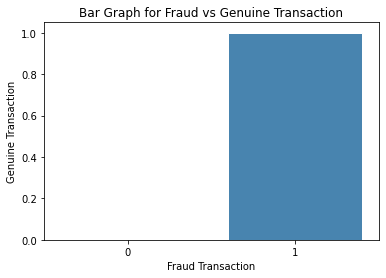

In [126]:
plt.title('Bar Graph for Fraud vs Genuine Transaction')
sns.barplot(x='Fraud Transaction',y='Genuine Transaction',data=plot_data,palette='Blues',edgecolor='w')

Text(0.5, 1.0, 'Time vs Amount')

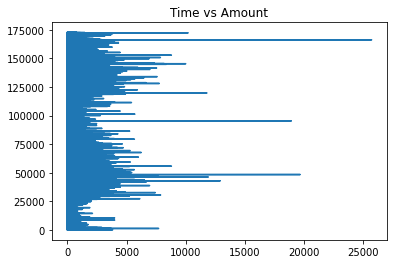

In [127]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')
#sns.barplot(x = x,y = y, data=data, palette='Blues', edgecolor='w')

Relation between Time and Amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


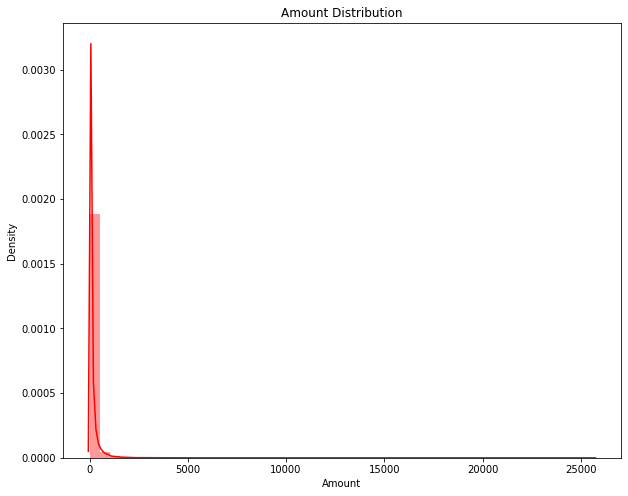

In [128]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'],color='red');

Outliers

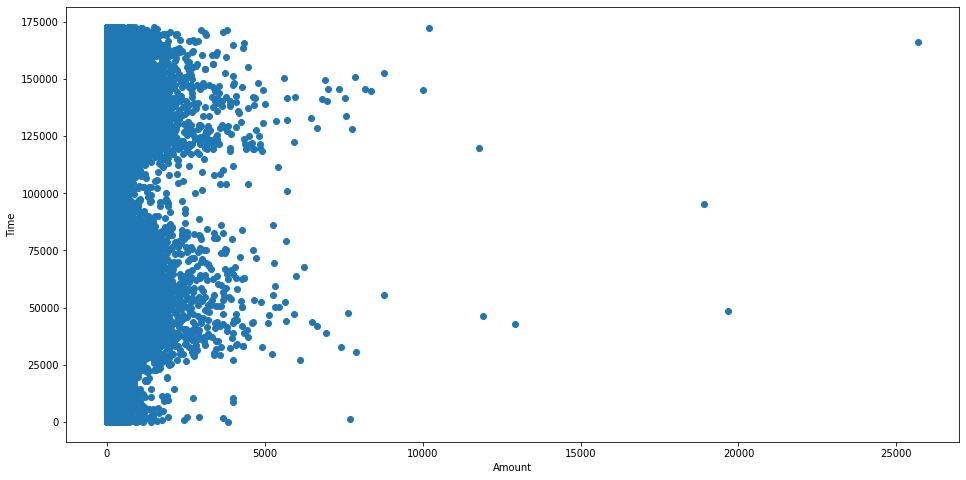

In [129]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

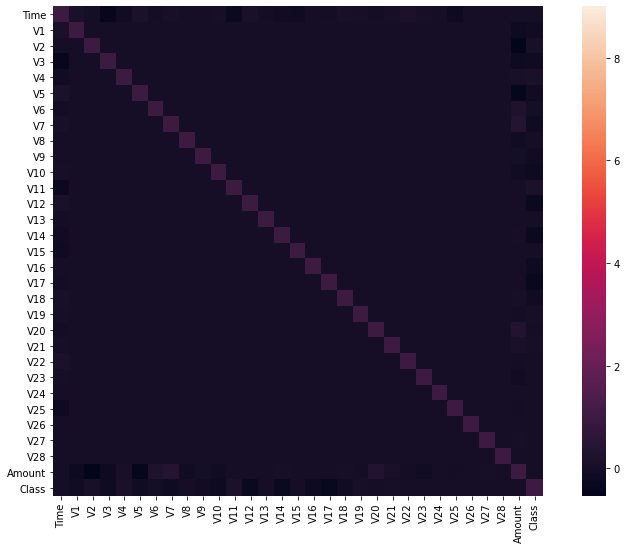

In [130]:
correlation_metrics = data_df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, vmax=9, square=True)
plt.show()

Modelling

In [131]:
x=data_df.drop(['Class'], axis=1)
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2 ,random_state=42)

In [132]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred = logisticreg.predict(xtest)
accuracy = logisticreg.score(xtest,ytest)

Accuracy check

In [134]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56829    35]
 [   43    55]]


Accuracy Score

In [135]:
print('Accuracy Score of Model', accuracy*100,'%')

Accuracy Score of Model 99.86306660580738 %
